In [1]:
import gosling as gos

# Datasets

In [2]:
mv = gos.Data(
    url="https://server.gosling-lang.org/api/v1/tileset_info/?d=cistrome-multivec",
    type="multivec",
    row="sample",
    column="position",
    value="peak",
    categories=["sample 1", "sample 2", "sample 3", "sample 4"],
    binSize=2
)

sv = gos.Data(
    url="https://raw.githubusercontent.com/sehilyi/gemini-datasets/master/data/rearrangements.bulk.1639.simple.filtered.pub",
    type="csv",
    headerNames=[
      "chr1",
      "p1s",
      "p1e",
      "chr2",
      "p2s",
      "p2e",
      "type",
      "id",
      "f1",
      "f2",
      "f3",
      "f4",
      "f5",
      "f6"
    ],
    separator="\t",
    genomicFieldsToConvert=[
        {"chromosomeField": "chr1", "genomicFields": ["p1s", "p1e"]},
        {"chromosomeField": "chr2", "genomicFields": ["p2s", "p2e"]}
    ]
)

# Individual Tracks & Views

Chart({
  layout: 'circular',
  spacing: 1,
  tracks: [Track({
    alignment: 'overlay',
    color: Channel({
      field: 'sample',
      range: ['steelblue', 'salmon', 'steelblue', 'salmon'],
      type: 'nominal'
    }),
    data: DataDeep({
      binSize: 2,
      categories: ['sample 1', 'sample 2', 'sample 3', 'sample 4'],
      column: 'position',
      row: 'sample',
      type: 'multivec',
      url: 'https://server.gosling-lang.org/api/v1/tileset_info/?d=cistrome-multivec',
      value: 'peak'
    }),
    height: 300,
    mark: 'bar',
    stroke: Channel({
      value: 'white'
    }),
    strokeWidth: Channel({
      value: 2
    }),
    tracks: [PartialTrack({
      
    }), PartialTrack({
      mark: 'brush',
      x: Channel({
        linkingId: 'detail-1'
      })
    }), PartialTrack({
      mark: 'brush',
      x: Channel({
        linkingId: 'detail-2'
      })
    })],
    width: 300,
    x: Channel({
      field: 'start',
      type: 'genomic'
    }),
    xe: Channel

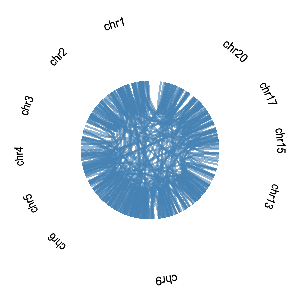

In [3]:
bar_base = gos.Track(data=mv).mark_bar().encode(
    x='start:G',
    xe='end:G',
    y='peak:Q',
    color=gos.Channel('sample:N', range=['steelblue', 'salmon', 'steelblue', 'salmon']),
    stroke=gos.Channel(value='white'),
    strokeWidth=gos.Channel(value=2)
)

bar_overview = bar_base.properties(
    width=300, height=300,
    alignment='overlay',
    tracks=[
        gos.PartialTrack(),
        gos.PartialTrack().mark_brush().encode(x=gos.Channel(linkingId='detail-1')),
        gos.PartialTrack().mark_brush().encode(x=gos.Channel(linkingId='detail-2'))
    ]
)

link = gos.Track(data=sv).mark_withinLink().encode(
    x='p1s:G',
    xe='p2e:G',
    stroke=gos.Channel('chr1:N', range=['steelblue']),
    strokeWidth=gos.Channel(value=2),
    opacity=gos.Channel(value=0.6)
).properties(
    width=300, height=100
)

overview = gos.Chart(
    layout="circular",
    spacing=1,
    tracks=[bar_overview, link]
)

overview

Chart({
  arrangement: 'vertical',
  spacing: 20,
  views: [Chart({
    linkingId: 'detail-1',
    tracks: [Track({
      color: Channel({
        field: 'sample',
        range: ['steelblue', 'salmon', 'steelblue', 'salmon'],
        type: 'nominal'
      }),
      data: DataDeep({
        binSize: 2,
        categories: ['sample 1', 'sample 2', 'sample 3', 'sample 4'],
        column: 'position',
        row: 'sample',
        type: 'multivec',
        url: 'https://server.gosling-lang.org/api/v1/tileset_info/?d=cistrome-multivec',
        value: 'peak'
      }),
      height: 100,
      mark: 'bar',
      stroke: Channel({
        value: 'white'
      }),
      strokeWidth: Channel({
        value: 0
      }),
      width: 300,
      x: Channel({
        field: 'start',
        type: 'genomic'
      }),
      xe: Channel({
        field: 'end',
        type: 'genomic'
      }),
      y: Channel({
        field: 'peak',
        type: 'quantitative'
      })
    })],
    xDomain: Doma

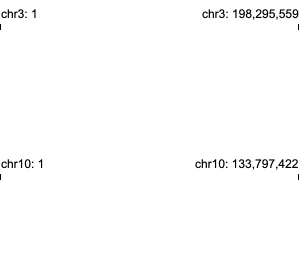

In [4]:
detail_1 = gos.Chart(
    linkingId='detail-1',
    xDomain=gos.Domain(chromosome='3'),
    tracks=[bar_base.encode(strokeWidth=gos.Channel(value=0)).properties(width=300, height=100)]
)

detail_2 = gos.Chart(
    linkingId='detail-2',
    xDomain=gos.Domain(chromosome='10'),
    tracks=[bar_base.encode(strokeWidth=gos.Channel(value=0)).properties(width=300, height=100)]
)

detail_view = gos.Chart(
    spacing=20,
    arrangement="vertical",
    views=[detail_1, detail_2]
)
detail_view

# Compose Views

Chart({
  arrangement: 'horizontal',
  title: 'Overview and Detail Views',
  views: [Chart({
    layout: 'circular',
    spacing: 1,
    tracks: [Track({
      alignment: 'overlay',
      color: Channel({
        field: 'sample',
        range: ['steelblue', 'salmon', 'steelblue', 'salmon'],
        type: 'nominal'
      }),
      data: DataDeep({
        binSize: 2,
        categories: ['sample 1', 'sample 2', 'sample 3', 'sample 4'],
        column: 'position',
        row: 'sample',
        type: 'multivec',
        url: 'https://server.gosling-lang.org/api/v1/tileset_info/?d=cistrome-multivec',
        value: 'peak'
      }),
      height: 300,
      mark: 'bar',
      stroke: Channel({
        value: 'white'
      }),
      strokeWidth: Channel({
        value: 2
      }),
      tracks: [PartialTrack({
        
      }), PartialTrack({
        mark: 'brush',
        x: Channel({
          linkingId: 'detail-1'
        })
      }), PartialTrack({
        mark: 'brush',
        x: C

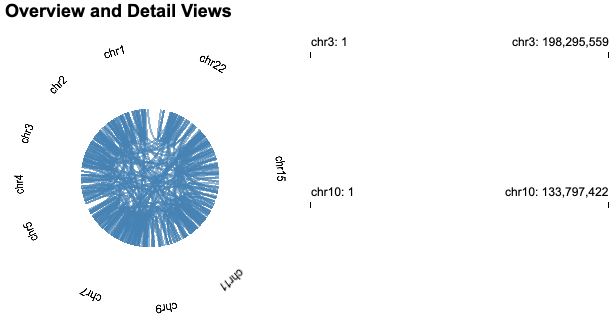

In [5]:
gos.Chart(
    title='Overview and Detail Views',
    arrangement='horizontal',
    views=[overview, detail_view]
)